In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [255]:
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image

# 자료 불러오기

In [5]:
TotalData = "./data/DNI과제데이터_거래일반.xlsx"

# ===============================================

#  고객정보

### EDA

In [231]:
고객정보 = pd.read_excel(TotalData, sheet_name = 3)
고객정보.tail()

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일
20584,517588,무점포,1형고객,1970-0417,회원대기,20201130,.
20585,517595,C점포,1형고객,1969-0107,회원가입,20201130,.
20586,517602,D점포,단체고객,NaN,회원가입,20201130,.
20587,517611,무점포,3형고객,1997-0704,회원가입,20201130,.
20588,517650,무점포,1형고객,1987-0304,회원대기,20201130,.


In [136]:
custom = 고객정보.copy()

In [385]:
custom.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20589 entries, 0 to 20588
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   고객번호    20589 non-null  bool 
 1   업장구분    20589 non-null  bool 
 2   고객분류    20589 non-null  bool 
 3   생년월일    20589 non-null  bool 
 4   고객상태    20589 non-null  bool 
 5   가입일     20589 non-null  bool 
 6   탈퇴일     20589 non-null  bool 
 7   가입기간    20589 non-null  bool 
dtypes: bool(8)
memory usage: 161.0 KB


In [387]:
## col별 null값 갯수 확인
custom.isnull().sum()

고객번호        0
업장구분      993
고객분류        0
생년월일     6926
고객상태        0
가입일       119
탈퇴일     15137
가입기간    15189
dtype: int64

In [8]:
# 고객번호 col 분석
print('''고객 수 : {}, 
max : {},
min : {}'''.format(고객정보.describe().iloc[0,0],고객정보.고객번호.max(),고객정보.고객번호.min()))
고객정보.describe()

고객 수 : 20589.0, 
max : 517650,
min : 72352


,고객번호
count,20589.000000
mean,303121.797465
std,151678.511943
min,72352.000000
25%,155494.000000
50%,313461.000000
75%,450934.000000
max,517650.000000


In [137]:
# 생일, 가입일, 탈퇴일 datetime으로 변경
custom.생년월일 = pd.to_datetime(custom['생년월일'], format='%Y-%m%d', errors='coerce')
custom.가입일 = pd.to_datetime(custom['가입일'], format='%Y%m%d', errors='coerce')
custom.탈퇴일 = pd.to_datetime(custom['탈퇴일'], format='%Y%m%d', errors='coerce')

custom.tail()

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일
20584,517588,무점포,1형고객,1970-04-17,회원대기,2020-11-30,NaT
20585,517595,C점포,1형고객,1969-01-07,회원가입,2020-11-30,NaT
20586,517602,D점포,단체고객,NaT,회원가입,2020-11-30,NaT
20587,517611,무점포,3형고객,1997-07-04,회원가입,2020-11-30,NaT
20588,517650,무점포,1형고객,1987-03-04,회원대기,2020-11-30,NaT


In [138]:
custom[custom.생년월일.notnull()]

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일
2,72357,무점포,1형고객,1968-04-20,회원가입,2001-02-11,NaT
3,72358,무점포,1형고객,1952-06-16,회원가입,2001-02-12,NaT
4,72359,무점포,1형고객,1960-02-05,회원가입,2001-02-14,NaT
5,72360,무점포,1형고객,1966-12-20,휴면고객,2001-02-16,NaT
6,72361,무점포,1형고객,1955-10-23,사용정지,2001-02-17,NaT
...,...,...,...,...,...,...,...
20583,517569,무점포,3형고객,1985-12-19,회원가입,2020-11-30,NaT
20584,517588,무점포,1형고객,1970-04-17,회원대기,2020-11-30,NaT
20585,517595,C점포,1형고객,1969-01-07,회원가입,2020-11-30,NaT
20587,517611,무점포,3형고객,1997-07-04,회원가입,2020-11-30,NaT


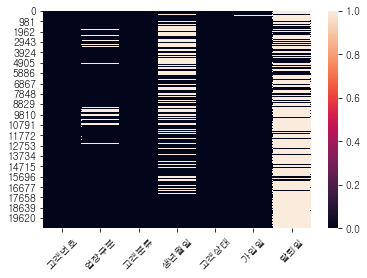

In [139]:
sns.heatmap(custom.isnull())
plt.xticks(rotation = 45)
plt.show()

## 분석 주제
### 1. 가입일과 탈퇴일 비교
        => 탈퇴가 가장 많은 일자 확인.
        => 어느기간에 고객관리를 많이 해야할 것인지 확인    

## 가입기간 분석
    탈퇴까지의 기간을 분석해서 고객유지를 도모하고자 함.

In [171]:
custom['가입기간'] = custom.탈퇴일 - custom.가입일
custom.tail()

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일,가입기간
20584,517588,무점포,1형고객,1970-04-17,회원대기,2020-11-30,NaT,NaT
20585,517595,C점포,1형고객,1969-01-07,회원가입,2020-11-30,NaT,NaT
20586,517602,D점포,단체고객,NaT,회원가입,2020-11-30,NaT,NaT
20587,517611,무점포,3형고객,1997-07-04,회원가입,2020-11-30,NaT,NaT
20588,517650,무점포,1형고객,1987-03-04,회원대기,2020-11-30,NaT,NaT


In [218]:
max(custom.가입기간[custom.가입기간.notnull()].dt.days)

7105

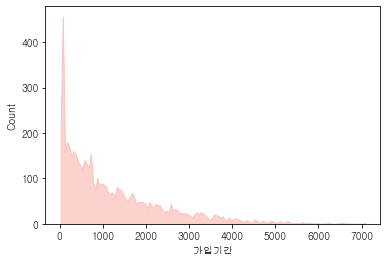

In [377]:
## 가입~탈퇴까지 기간 시각화
sns.histplot(custom.가입기간[custom.가입기간.notnull()].dt.days, bins=142, color = "#FAC3BE"
             , element='poly')
plt.show()

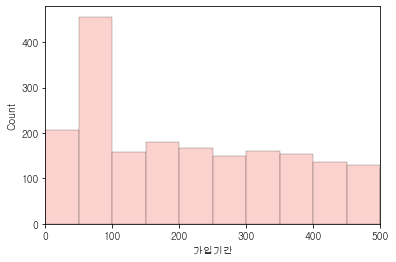

In [378]:
sns.histplot(custom.가입기간[custom.가입기간.notnull()].dt.days, bins=142, color='#FAC3BE')
plt.xlim(0,500)
plt.show()

## 50~100일 사이에 많은 수의 탈퇴자가 발생함.

==============================================================
#####  업장구분
    업장 수 : 10 (null 제외 = 9)

In [140]:
custom.업장구분.unique()

array([nan, '무점포', 'A점포', 'B점포', 'C점포', 'D점포', 'E점포', 'F점포', 'H점포', 'G점포'],
      dtype=object)

In [141]:
# 업장 수
len(custom.업장구분.unique())

10

In [142]:
custom.groupby('업장구분')['고객번호'].count()

업장구분
A점포    1854
B점포     927
C점포    2411
D점포     881
E점포    2279
F점포    3031
G점포       1
H점포    1737
무점포    6475
Name: 고객번호, dtype: int64

In [628]:
## null값 = 993
custom[custom.업장구분.isnull()]

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일,가입기간
0,72352,NaN,기타,NaT,회원가입,2006-06-12,NaT,NaT
1722,75174,NaN,생산업체,NaT,사용정지,2006-06-22,NaT,NaT
1723,75176,NaN,생산업체,NaT,사용정지,2006-06-22,NaT,NaT
1724,75178,NaN,생산업체,NaT,회원가입,2006-06-22,NaT,NaT
1725,75204,NaN,생산업체,NaT,사용정지,2006-06-22,NaT,NaT
...,...,...,...,...,...,...,...,...
14049,423348,NaN,일반거래처,NaT,회원가입,2017-12-01,NaT,NaT
14062,423801,NaN,일반거래처,NaT,회원가입,2017-12-08,NaT,NaT
14083,424773,NaN,일반거래처,NaT,회원가입,2017-12-26,NaT,NaT
14084,424779,NaN,일반거래처,NaT,회원가입,2017-12-26,NaT,NaT


<AxesSubplot:xlabel='업장구분', ylabel='count'>

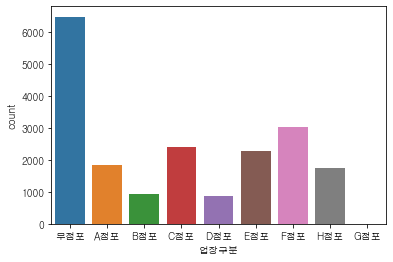

In [388]:
## barchart
sns.countplot(data = custom, x='업장구분')

In [389]:
## pie chart
labels = custom.groupby('업장구분')['고객번호'].count().index.tolist()
labels.append('미기입')
labels

['A점포', 'B점포', 'C점포', 'D점포', 'E점포', 'F점포', 'G점포', 'H점포', '무점포', '미기입']

In [314]:
ratio = custom.groupby('업장구분')['고객번호'].count().tolist()
ratio.append(sum(custom.업장구분.isnull()))
ratio

[1854, 927, 2411, 881, 2279, 3031, 1, 1737, 6475, 993]

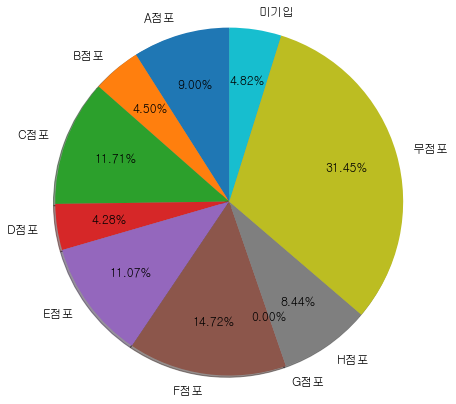

In [381]:
plt.pie(ratio, labels=labels,
        autopct='%1.2f%%', 
        pctdistance=.7,
        startangle=90,
        radius=2,
        shadow=True,
        textprops={'fontsize': 12})
plt.show()

### 2. 업장별 분석
        1) 어느 업장이 많은지
        2) 업장별 고객분류비율, 고객상태 비율 확인

In [411]:
# 업장구분 = null 제외 분석
## 점포별 고객상태 분석
custom.groupby(['업장구분','고객상태'])['고객번호'].count().loc['A점포']

고객상태
사용정지      19
회원가입    1411
회원탈퇴     423
휴면고객       1
Name: 고객번호, dtype: int64

<AxesSubplot:xlabel='업장구분', ylabel='count'>

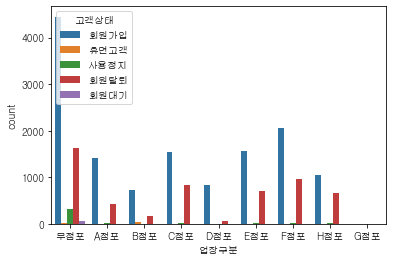

In [390]:
# 점포별 고객상태 분석
## 비율로 바꾸서 비교할것.
sns.countplot(data = custom, x='업장구분', hue='고객상태')

### 3. 고객 연령분석
        1) 전체 
        2) 고객분류별
        3) 업장별

In [428]:
cus_birth = custom[custom.생년월일.notnull()]  ## sql 문제에도 넣기
cus_birth =  cus_birth.reset_index(drop = True)
cus_birth.head()

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일,가입기간
0,72357,무점포,1형고객,1968-04-20,회원가입,2001-02-11,NaT,NaT
1,72358,무점포,1형고객,1952-06-16,회원가입,2001-02-12,NaT,NaT
2,72359,무점포,1형고객,1960-02-05,회원가입,2001-02-14,NaT,NaT
3,72360,무점포,1형고객,1966-12-20,휴면고객,2001-02-16,NaT,NaT
4,72361,무점포,1형고객,1955-10-23,사용정지,2001-02-17,NaT,NaT


In [429]:
cus_birth['연령대'] = '미입력'
cus_birth.head()

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일,가입기간,연령대
0,72357,무점포,1형고객,1968-04-20,회원가입,2001-02-11,NaT,NaT,미입력
1,72358,무점포,1형고객,1952-06-16,회원가입,2001-02-12,NaT,NaT,미입력
2,72359,무점포,1형고객,1960-02-05,회원가입,2001-02-14,NaT,NaT,미입력
3,72360,무점포,1형고객,1966-12-20,휴면고객,2001-02-16,NaT,NaT,미입력
4,72361,무점포,1형고객,1955-10-23,사용정지,2001-02-17,NaT,NaT,미입력


In [430]:
## 고객 연령대 분석
print(min(cus_birth.생년월일.dt.year))
print(max(cus_birth.생년월일.dt.year))

1901
1999


In [432]:
ind = 0
for i in cus_birth.생년월일.dt.year: 
    if i > 1991 :
        cus_birth['연령대'].iloc[ind] = '20대'
    elif i > 1981 :
        cus_birth['연령대'].iloc[ind] = '30대'
    elif i > 1971 :
        cus_birth['연령대'].iloc[ind] = '40대'
    elif i > 1961 :
        cus_birth['연령대'].iloc[ind] = '50대'
    elif i > 1951 :
        cus_birth['연령대'].iloc[ind] = '60대'
    elif i > 1941 :
        cus_birth['연령대'].iloc[ind] = '70대'
    elif i > 1931 :
        cus_birth['연령대'].iloc[ind] = '80대'
    elif i > 1921 :
        cus_birth['연령대'].iloc[ind] = '90대'
    else : 
        cus_birth['연령대'].iloc[ind] = '그외'
    ind+=1    

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [437]:
cus_birth.tail()

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일,가입기간,연령대
13658,517569,무점포,3형고객,1985-12-19,회원가입,2020-11-30,NaT,NaT,30대
13659,517588,무점포,1형고객,1970-04-17,회원대기,2020-11-30,NaT,NaT,50대
13660,517595,C점포,1형고객,1969-01-07,회원가입,2020-11-30,NaT,NaT,50대
13661,517611,무점포,3형고객,1997-07-04,회원가입,2020-11-30,NaT,NaT,20대
13662,517650,무점포,1형고객,1987-03-04,회원대기,2020-11-30,NaT,NaT,30대


In [444]:
## 고객 연령대 분포분석
bir_range = cus_birth.groupby('연령대')['고객번호'].count().to_frame().sort_values(by='연령대')
bir_range

,고객번호
연령대,
20대,253
30대,2809
40대,4299
50대,3720
60대,1865
70대,548
80대,132
90대,10
그외,27


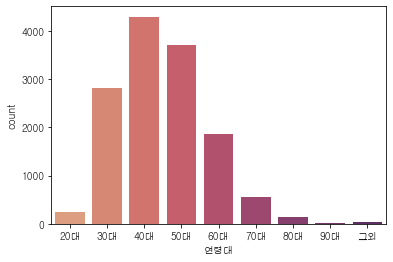

In [454]:
## barchart
sns.barplot(data = bir_range, x = bir_range.index, y="고객번호", palette="flare")
plt.ylabel('count')
plt.show()
## 연령대가 등록된 주 고객은 30~ 60대 고객

In [461]:
## 연령대별 고객상태
cus_birth.groupby(['연령대','고객상태'])['고객번호'].count().to_frame()

고객번호
연령대 고객상태      
20대 회원가입   251
    회원대기     1
    회원탈퇴     1
30대 사용정지     7
    회원가입  2764
    회원대기    29
    회원탈퇴     7
    휴면고객     2
40대 사용정지   110
    회원가입  4155
    회원대기    14
    회원탈퇴     3
    휴면고객    17
50대 사용정지   154
    회원가입  3529
    회원대기    10
    회원탈퇴     4
    휴면고객    23
60대 사용정지    62
    회원가입  1798
    회원대기     1
    휴면고객     4
70대 사용정지    14
    회원가입   534
80대 사용정지     7
    회원가입   122
    회원탈퇴     3
90대 회원가입    10
그외  사용정지     2
    회원가입    23
    회원대기     1
    휴면고객     1

In [462]:
## 연령대별 업장분석
cus_birth.groupby(['연령대','업장구분'])['고객번호'].count().to_frame()

고객번호
연령대 업장구분      
20대 A점포      1
    B점포      2
    C점포      5
    D점포     16
    E점포      5
...        ...
그외  D점포      2
    E점포      3
    F점포      5
    H점포      1
    무점포      9

[70 rows x 1 columns]

In [555]:
custom[custom.고객번호==495094]

,고객번호,업장구분,고객분류,생년월일,고객상태,가입일,탈퇴일,가입기간
18146,495094,무점포,단체고객,1984-05-27,회원가입,2020-05-29,NaT,NaT


# ===============================================

# 거래데이터

## EDA

In [146]:
거래데이터 = pd.read_excel(TotalData, sheet_name = 4)
거래데이터.tail()

,고객번호,매장,구매일자,상품번호,상품명,구매단가,구매수량,실제구매액,할인금액
491150,517602,F점포,20201130,32215,돼지앞다리살(불고기,10600,75,795000,NaN
491151,517602,F점포,20201130,20397,양파(1kg/대과/무농약,3450,25,86250,NaN
491152,517602,F점포,20201130,10376,팽이버섯(450g/무농약,1900,25,47500,NaN
491153,517602,F점포,20201130,5959,(영)중파(300g/),1700,25,42500,NaN
491154,517602,F점포,20201130,9,생명나눔 햅쌀백미(2k,8000,75,600000,NaN


In [464]:
deal = 거래데이터.copy()
deal.tail()

,고객번호,매장,구매일자,상품번호,상품명,구매단가,구매수량,실제구매액,할인금액
491150,517602,F점포,20201130,32215,돼지앞다리살(불고기,10600,75,795000,NaN
491151,517602,F점포,20201130,20397,양파(1kg/대과/무농약,3450,25,86250,NaN
491152,517602,F점포,20201130,10376,팽이버섯(450g/무농약,1900,25,47500,NaN
491153,517602,F점포,20201130,5959,(영)중파(300g/),1700,25,42500,NaN
491154,517602,F점포,20201130,9,생명나눔 햅쌀백미(2k,8000,75,600000,NaN


In [465]:
## 구매일자 datatype변경
deal.구매일자 = pd.to_datetime(deal['구매일자'], format='%Y%m%d', errors='coerce')
deal.tail()

,고객번호,매장,구매일자,상품번호,상품명,구매단가,구매수량,실제구매액,할인금액
491150,517602,F점포,2020-11-30,32215,돼지앞다리살(불고기,10600,75,795000,NaN
491151,517602,F점포,2020-11-30,20397,양파(1kg/대과/무농약,3450,25,86250,NaN
491152,517602,F점포,2020-11-30,10376,팽이버섯(450g/무농약,1900,25,47500,NaN
491153,517602,F점포,2020-11-30,5959,(영)중파(300g/),1700,25,42500,NaN
491154,517602,F점포,2020-11-30,9,생명나눔 햅쌀백미(2k,8000,75,600000,NaN


In [466]:
deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491155 entries, 0 to 491154
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   고객번호    491155 non-null  int64         
 1   매장      491155 non-null  object        
 2   구매일자    491155 non-null  datetime64[ns]
 3   상품번호    491155 non-null  int64         
 4   상품명     489670 non-null  object        
 5   구매단가    491155 non-null  int64         
 6   구매수량    491155 non-null  int64         
 7   실제구매액   491155 non-null  int64         
 8   할인금액    252360 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 33.7+ MB


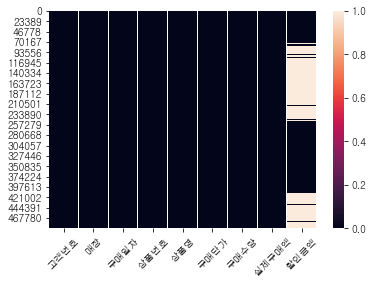

In [467]:
sns.heatmap(deal.isnull())
plt.xticks(rotation = 45)
plt.show()

In [468]:
## 할인금액의 nan값 = 0으로 변경
deal.할인금액.fillna(0, inplace=True)
deal.tail()

,고객번호,매장,구매일자,상품번호,상품명,구매단가,구매수량,실제구매액,할인금액
491150,517602,F점포,2020-11-30,32215,돼지앞다리살(불고기,10600,75,795000,0.0
491151,517602,F점포,2020-11-30,20397,양파(1kg/대과/무농약,3450,25,86250,0.0
491152,517602,F점포,2020-11-30,10376,팽이버섯(450g/무농약,1900,25,47500,0.0
491153,517602,F점포,2020-11-30,5959,(영)중파(300g/),1700,25,42500,0.0
491154,517602,F점포,2020-11-30,9,생명나눔 햅쌀백미(2k,8000,75,600000,0.0


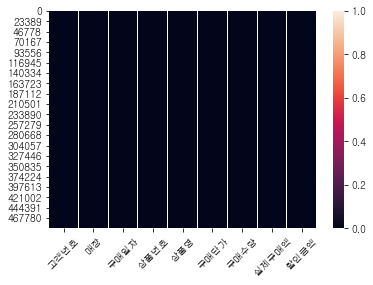

In [469]:
sns.heatmap(deal.isnull())
plt.xticks(rotation = 45)
plt.show()

In [470]:
deal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491155 entries, 0 to 491154
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   고객번호    491155 non-null  int64         
 1   매장      491155 non-null  object        
 2   구매일자    491155 non-null  datetime64[ns]
 3   상품번호    491155 non-null  int64         
 4   상품명     489670 non-null  object        
 5   구매단가    491155 non-null  int64         
 6   구매수량    491155 non-null  int64         
 7   실제구매액   491155 non-null  int64         
 8   할인금액    491155 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 33.7+ MB


## 분석 주제
    1. 우수고객(구매금액 기준)
        1.통합 우수고객
        2.점포별 우수고객
    
    2. 인기상품
        : 많이 팔린 상품
    
    3. 최대 수익 상품
        : 수익이 좋은 상품

## 우수고객
    1. 통합 우수고객
    2. 업장별 우수고객

In [472]:
## 우수고객 : max(총구매액)
deal['총구매액'] = deal.실제구매액 - deal.할인금액

In [473]:
deal.tail()

,고객번호,매장,구매일자,상품번호,상품명,구매단가,구매수량,실제구매액,할인금액,총구매액
491150,517602,F점포,2020-11-30,32215,돼지앞다리살(불고기,10600,75,795000,0.0,795000.0
491151,517602,F점포,2020-11-30,20397,양파(1kg/대과/무농약,3450,25,86250,0.0,86250.0
491152,517602,F점포,2020-11-30,10376,팽이버섯(450g/무농약,1900,25,47500,0.0,47500.0
491153,517602,F점포,2020-11-30,5959,(영)중파(300g/),1700,25,42500,0.0,42500.0
491154,517602,F점포,2020-11-30,9,생명나눔 햅쌀백미(2k,8000,75,600000,0.0,600000.0


In [500]:
## 상위 10개 우수고객의 고객번호
deal.groupby('고객번호')['총구매액'].sum().sort_values(ascending=False)[:10]

고객번호
495094    445476000.0
497429    217450000.0
75432      57206829.0
497820     42299400.0
309486     24323269.0
165339     24110587.0
222777     21825560.0
75169      21794954.0
73893      21047770.0
73481      20530031.0
Name: 총구매액, dtype: float64

In [501]:
deal.groupby('고객번호')['총구매액'].sum().sort_values(ascending=False)

고객번호
495094    445476000.0
497429    217450000.0
75432      57206829.0
497820     42299400.0
309486     24323269.0
             ...     
128793            0.0
227441            0.0
493950            0.0
170352       -54400.0
440404      -186800.0
Name: 총구매액, Length: 8283, dtype: float64

In [509]:
## -값이 나오는 고객 확인
deal[(deal.고객번호==440404)|(deal.고객번호==170352)]

,고객번호,매장,구매일자,상품번호,상품명,구매단가,구매수량,실제구매액,할인금액,총구매액
2134,440404,A점포,2020-06-01,3007,대추방울토마토(500g/,4100,-1,-4100,0.0,-4100.0
2135,440404,A점포,2020-06-01,166,토마토(2kg/무농약),8500,-3,-25500,0.0,-25500.0
2136,440404,A점포,2020-06-01,13322,순살어묵(250g),4200,-1,-4200,0.0,-4200.0
2137,440404,A점포,2020-06-01,25314,딸기잼(대),9000,-2,-18000,0.0,-18000.0
2138,440404,A점포,2020-06-01,579,두부어묵(270g),4400,-1,-4400,0.0,-4400.0
2139,440404,A점포,2020-06-01,1432,황태채(200g)/러시아,12300,-1,-12300,0.0,-12300.0
2140,440404,A점포,2020-06-01,580,옛날어묵(300g),4400,-1,-4400,0.0,-4400.0
2141,440404,A점포,2020-06-01,29294,착한식빵,2800,-2,-5600,0.0,-5600.0
2142,440404,A점포,2020-06-01,652,우유식빵,4800,-2,-9600,0.0,-9600.0
2143,440404,A점포,2020-06-01,7572,(영)숙주나물(300g,2500,-2,-5000,0.0,-5000.0


In [524]:
## 업장별 우수고객
### shop_cus :: index = 고객번호, col = 매장, values = 총구매액
shop_cus = deal.groupby(['고객번호','매장'])['총구매액'].sum().sort_values(ascending=False).unstack()
shop_cus.head()

매장,A점포,B점포,C점포,D점포,ERP,E점포,F점포,H점포,선물,쇼핑몰,예약
고객번호,,,,,,,,,,,
1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490740.0,NaN,NaN,NaN
9773,102200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9829,219290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11434,82250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11485,NaN,NaN,NaN,85300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [521]:
deal.groupby(['고객번호','매장'])['총구매액'].sum().sort_values(ascending=False).unstack()

매장,A점포,B점포,C점포,D점포,ERP,E점포,F점포,H점포,선물,쇼핑몰,예약
고객번호,,,,,,,,,,,
1297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490740.0,NaN,NaN,NaN
9773,102200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9829,219290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11434,82250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11485,NaN,NaN,NaN,85300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
517330,NaN,NaN,NaN,NaN,NaN,31500.0,NaN,NaN,NaN,NaN,NaN
517365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54000.0,NaN
517459,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,NaN


In [551]:
## 업장별 우수고객
for i in shop_cus.columns:
        print(i,shop_cus[i].sort_values(ascending=False)[:5].to_frame().index.tolist())

A점포 [495094, 497429, 114949, 496599, 75432]
B점포 [449821, 97218, 108615, 450509, 450406]
C점포 [437667, 75432, 343532, 107142, 427571]
D점포 [459839, 494943, 75432, 163840, 134621]
ERP [497820, 75169, 72405, 75171, 73893]
E점포 [75432, 131083, 134777, 116051, 222792]
F점포 [75432, 437669, 447147, 73364, 166625]
H점포 [180302, 437670, 73179, 73831, 73413]
선물 [444703, 403855, 444971, 293950, 73543]
쇼핑몰 [309486, 165339, 222777, 73481, 75068]
예약 [73481, 267462, 73772, 303047, 468548]


## 최대 구매액
    단품기준

In [577]:
## 단품기준 최대매출상품
deal.groupby('상품명')['총구매액'].sum().sort_values(ascending=False)[:5]

상품명
백미4kg(무농약/연천)     73612560.0
유기농백미즉석밥(210      71640125.0
백미(4kg/유기/삼광)     60737204.0
(영)유정란(30알/       58349425.0
혼합15곡(1kg/무농약)    52090070.0
Name: 총구매액, dtype: float64

## 인기상품(많이 팔린 기준)
    1. 단품기준
    2. 소분류 기준(&& 상품데이터 )

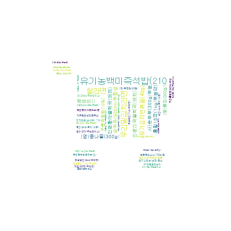

In [605]:
## 소분류 wordcloud
icon = Image.open('./data/cart.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


WC = WordCloud(background_color="white",font_path='c:/windows/fonts/gulim.ttc', mask=mask)
cloud=WC.generate_from_frequencies(deal.groupby('상품명')['구매수량'].sum())
plt.axis('off')

plt.imshow(cloud)

cloud.to_file('인기상품.png')

In [589]:
deal.groupby('상품명')['구매수량'].sum().sort_values(ascending=False)[:5]

상품명
유기농백미즉석밥(210    42147
우리밀김치라면         22403
쌀라면             22372
유기김자반볶음(40g)    11762
간편미역블럭국(해체)      9540
Name: 구매수량, dtype: int64

# ===============================================

## 상품데이터

    수익률 좋은 상품 / 나쁜상품

In [148]:
상품데이터 = pd.read_excel(TotalData, sheet_name = 5)
상품데이터.tail()

,상품번호,대분류명,중분류명,소분류명,상품명,매입단가,판매가
6270,34799,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(숯/퀸이상),"99,000",151300.0
6271,34789,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(워싱/더블),"67,000",98800.0
6272,34800,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(황토/더블),"82,000",120000.0
6273,34801,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(황토/퀸이상),"99,000",151300.0
6274,28144,환경생활용품,홈인테리어,패드겸이불,황토 인견 줄누비패드 Q,"81,000",120000.0


In [150]:
product = 상품데이터.copy()
product.tail()

,상품번호,대분류명,중분류명,소분류명,상품명,매입단가,판매가
6270,34799,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(숯/퀸이상),"99,000",151300.0
6271,34789,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(워싱/더블),"67,000",98800.0
6272,34800,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(황토/더블),"82,000",120000.0
6273,34801,환경생활용품,홈인테리어,패드겸이불,인견 패드겸이불(황토/퀸이상),"99,000",151300.0
6274,28144,환경생활용품,홈인테리어,패드겸이불,황토 인견 줄누비패드 Q,"81,000",120000.0


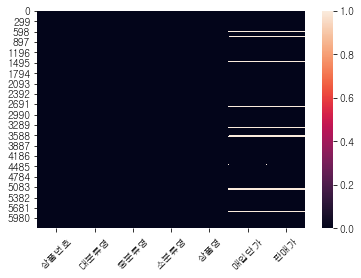

In [243]:
sns.heatmap(product.isnull())
plt.xticks(rotation = 45)
plt.show()

In [622]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품번호    6275 non-null   int64  
 1   대분류명    6275 non-null   object 
 2   중분류명    6275 non-null   object 
 3   소분류명    6275 non-null   object 
 4   상품명     6274 non-null   object 
 5   매입단가    5925 non-null   object 
 6   판매가     5925 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 343.3+ KB


In [613]:
product.describe()

,상품번호,판매가
count,6275.000000,5.925000e+03
mean,24667.659124,2.023221e+04
std,12236.636198,4.312499e+04
min,1.000000,2.000000e+02
25%,15634.500000,4.700000e+03
50%,26667.000000,9.800000e+03
75%,35062.000000,2.160000e+04
max,42123.000000,2.132000e+06


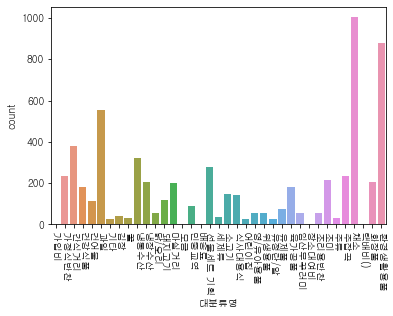

In [244]:
sns.countplot(data = product, x='대분류명')
plt.xticks(rotation=270)
plt.show()

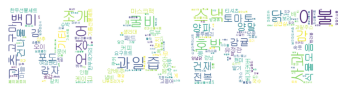

In [588]:
## 소분류 wordcloud
icon = Image.open('./data/mart1.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


WC = WordCloud(background_color="white",font_path='c:/windows/fonts/gulim.ttc', mask=mask)
cloud=WC.generate_from_frequencies(product.groupby('소분류명')['상품번호'].count())
plt.axis('off')
plt.imshow(cloud)
cloud.to_file('소분류.png')

##  상품별 수익률

In [627]:
pro_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5925 entries, 1 to 6274
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품번호    5925 non-null   int64  
 1   대분류명    5925 non-null   object 
 2   중분류명    5925 non-null   object 
 3   소분류명    5925 non-null   object 
 4   상품명     5925 non-null   object 
 5   매입단가    5925 non-null   object 
 6   판매가     5925 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 370.3+ KB


# 데이터 병합
    전체데이터가 아니기 때문에 일부 오류존재